In [1]:
#imports
import pandas as pd
import gzip
import json
import copy
import math
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm

import numpy as np
%matplotlib notebook

In [2]:
ASPECT_METHODS=['consolidated','manual','rule_based','rule_heuristic']
EMOTE_METHODS=['m1_non_zero_mean','m1','m2']
EMOTIONS=["fear", "anger", "anticip", "trust", "surprise", "positive", "negative", "sadness", "disgust", "joy"]
DF_NAMES=['M1_NON_ZERO_MEAN_NOUN_FREQUENCY',
'M1_NOUN_FREQUENCY',
'M2_NOUN_FREQUENCY',
'M1_NON_ZERO_MEAN_MANUAL',
'M1_MANUAL',
'M2_MANUAL',
'M1_NON_ZERO_MEAN_RULE_BASED',
'M1_RULE_BASED',
'M2_RULE_BASED',
'M1_NON_ZERO_MEAN_RULE_HEURISTIC',
'M1_RULE_HEURISTIC',
'M2_RULE_HEURISTIC']


M1_NON_ZERO_MEAN_CONSOLIDATED = 0
M1_CONSOLIDATED = 1
M2_CONSOLIDATED = 2
M1_NON_ZERO_MEAN_MANUAL = 3
M1_MANUAL = 4
M2_MANUAL = 5
M1_NON_ZERO_MEAN_RULE_BASED = 6
M1_RULE_BASED = 7
M2_RULE_BASED = 8
M1_NON_ZERO_MEAN_RULE_HEURISTIC = 9
M1_RULE_HEURISTIC = 10
M2_RULE_HEURISTIC = 11

In [3]:
#get all to aspect emotion dataset
i=0
aspect_emote_dfs=[]
for aspect in ASPECT_METHODS:
    for method in EMOTE_METHODS:
        name=method+"_"+aspect
        print(name.upper()+" = "+ str(i))
        #print("'"+name.upper()+"',")
        
        i+=1
        
        emote_csv_name="dataset/aspects_emotions_"+method+"_"+aspect+".csv"
        emote_df=pd.read_csv(emote_csv_name)
        aspect_emote_dfs.append(emote_df)

M1_NON_ZERO_MEAN_CONSOLIDATED = 0
M1_CONSOLIDATED = 1
M2_CONSOLIDATED = 2
M1_NON_ZERO_MEAN_MANUAL = 3
M1_MANUAL = 4
M2_MANUAL = 5
M1_NON_ZERO_MEAN_RULE_BASED = 6
M1_RULE_BASED = 7
M2_RULE_BASED = 8
M1_NON_ZERO_MEAN_RULE_HEURISTIC = 9
M1_RULE_HEURISTIC = 10
M2_RULE_HEURISTIC = 11


In [4]:
for df in aspect_emote_dfs:
    display(df)

,asin,aspect,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,B00005LBZO,product,0.493590,0.500000,0.484722,0.414560,0.291667,0.611068,0.475962,0.153846,0.000000,0.301465
1,B00005LBZO,product_recipient,0.205556,0.340000,0.326515,0.311364,0.155952,0.436765,0.403333,0.240000,0.138889,0.250000
2,B00005LBZO,year,0.250000,0.333333,0.219048,0.269048,0.183333,0.339583,0.416667,0.250000,0.500000,0.255556
3,B00005LBZO,time,0.000000,0.250000,0.622917,0.250000,0.225000,0.290000,0.291667,0.333333,0.000000,0.233333
4,B00005LBZO,bike,0.000000,0.250000,0.250000,0.000000,0.000000,0.625000,0.375000,0.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,B01CWSRW62,minute,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000
296,B01CWSRW62,day,0.111111,0.000000,0.111111,0.111111,0.111111,0.574074,0.305556,0.111111,0.000000,0.111111
297,B01CWSRW62,plug,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.433333,0.333333,0.200000,0.200000
298,B01CWSRW62,great,0.000000,0.250000,0.166667,0.166667,0.166667,0.250000,0.333333,0.000000,0.000000,0.166667


,asin,aspect,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,B00005LBZO,product,0.044872,0.015152,0.088131,0.087937,0.026515,0.277758,0.057692,0.004662,0.000000,0.063947
1,B00005LBZO,product_recipient,0.018687,0.051515,0.108838,0.103788,0.033081,0.225000,0.122222,0.036364,0.012626,0.075758
2,B00005LBZO,year,0.013158,0.017544,0.080702,0.099123,0.048246,0.142982,0.109649,0.013158,0.026316,0.080702
3,B00005LBZO,time,0.000000,0.027778,0.553704,0.027778,0.050000,0.161111,0.064815,0.037037,0.000000,0.077778
4,B00005LBZO,bike,0.000000,0.050000,0.050000,0.000000,0.000000,0.250000,0.150000,0.100000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,B01CWSRW62,minute,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000
296,B01CWSRW62,day,0.027778,0.000000,0.027778,0.027778,0.027778,0.430556,0.152778,0.027778,0.000000,0.027778
297,B01CWSRW62,plug,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.288889,0.111111,0.066667,0.066667
298,B01CWSRW62,great,0.000000,0.100000,0.033333,0.033333,0.033333,0.100000,0.066667,0.000000,0.000000,0.033333


,asin,aspect,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,B00005LBZO,product,0.084746,0.016949,0.101695,0.118644,0.067797,0.355932,0.084746,0.033898,0.000000,0.135593
1,B00005LBZO,product_recipient,0.029703,0.049505,0.128713,0.128713,0.069307,0.267327,0.108911,0.049505,0.029703,0.138614
2,B00005LBZO,year,0.019231,0.019231,0.153846,0.134615,0.096154,0.250000,0.115385,0.019231,0.019231,0.173077
3,B00005LBZO,time,0.000000,0.038462,0.423077,0.038462,0.076923,0.192308,0.076923,0.038462,0.000000,0.115385
4,B00005LBZO,bike,0.000000,0.142857,0.142857,0.000000,0.000000,0.285714,0.285714,0.142857,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,B01CWSRW62,minute,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000
296,B01CWSRW62,day,0.083333,0.000000,0.083333,0.083333,0.083333,0.333333,0.166667,0.083333,0.000000,0.083333
297,B01CWSRW62,plug,0.000000,0.000000,0.125000,0.000000,0.000000,0.125000,0.375000,0.125000,0.125000,0.125000
298,B01CWSRW62,great,0.000000,0.222222,0.111111,0.111111,0.111111,0.222222,0.111111,0.000000,0.000000,0.111111


,asin,aspect,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,B00005LBZO,product,0.493590,0.50,0.484722,0.414560,0.291667,0.611068,0.475962,0.153846,0.000000,0.301465
1,B00005LBZO,product_recipient,0.205556,0.34,0.326515,0.311364,0.155952,0.436765,0.403333,0.240000,0.138889,0.250000
2,B00005LBZO,quality,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,B00005LBZO,battery,0.000000,0.50,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
4,B00005LBZO,price,0.000000,0.00,0.200000,0.200000,0.000000,0.400000,0.000000,0.000000,0.000000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
265,B01CWSRW62,price,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
266,B01CWSRW62,box,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
267,B01CWSRW62,color,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
268,B01CWSRW62,speed,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,asin,aspect,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,B00005LBZO,product,0.044872,0.015152,0.088131,0.087937,0.026515,0.277758,0.057692,0.004662,0.000000,0.063947
1,B00005LBZO,product_recipient,0.018687,0.051515,0.108838,0.103788,0.033081,0.225000,0.122222,0.036364,0.012626,0.075758
2,B00005LBZO,quality,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,B00005LBZO,battery,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
4,B00005LBZO,price,0.000000,0.000000,0.200000,0.200000,0.000000,0.400000,0.000000,0.000000,0.000000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
265,B01CWSRW62,price,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
266,B01CWSRW62,box,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
267,B01CWSRW62,color,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
268,B01CWSRW62,speed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,asin,aspect,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,B00005LBZO,product,0.084746,0.016949,0.101695,0.118644,0.067797,0.355932,0.084746,0.033898,0.000000,0.135593
1,B00005LBZO,product_recipient,0.029703,0.049505,0.128713,0.128713,0.069307,0.267327,0.108911,0.049505,0.029703,0.138614
2,B00005LBZO,quality,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,B00005LBZO,battery,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
4,B00005LBZO,price,0.000000,0.000000,0.200000,0.200000,0.000000,0.400000,0.000000,0.000000,0.000000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
265,B01CWSRW62,price,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
266,B01CWSRW62,box,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
267,B01CWSRW62,color,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
268,B01CWSRW62,speed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,asin,aspect,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,B00005LBZO,product,0.493590,0.500000,0.484722,0.414560,0.291667,0.611068,0.475962,0.153846,0.000000,0.301465
1,B00005LBZO,product_recipient,0.205556,0.340000,0.326515,0.311364,0.155952,0.436765,0.403333,0.240000,0.138889,0.250000
2,B00005LBZO,wheel,0.333333,0.000000,0.000000,0.500000,0.000000,0.833333,0.666667,0.000000,0.000000,0.000000
3,B00005LBZO,time,0.000000,0.250000,0.622917,0.250000,0.225000,0.290000,0.291667,0.333333,0.000000,0.233333
4,B00005LBZO,bike,0.000000,0.250000,0.250000,0.000000,0.000000,0.625000,0.375000,0.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,B01CWSRW62,great,0.000000,0.250000,0.166667,0.166667,0.166667,0.250000,0.333333,0.000000,0.000000,0.166667
296,B01CWSRW62,wa,0.392857,0.142857,0.269048,0.142857,0.142857,0.415238,0.359048,0.238095,0.171429,0.219048
297,B01CWSRW62,money,0.000000,0.144841,0.144841,0.144841,0.144841,0.192460,0.125000,0.000000,0.125000,0.144841
298,B01CWSRW62,european plug,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,asin,aspect,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,B00005LBZO,product,0.044872,0.015152,0.088131,0.087937,0.026515,0.277758,0.057692,0.004662,0.000000,0.063947
1,B00005LBZO,product_recipient,0.018687,0.051515,0.108838,0.103788,0.033081,0.225000,0.122222,0.036364,0.012626,0.075758
2,B00005LBZO,wheel,0.055556,0.000000,0.000000,0.083333,0.000000,0.416667,0.111111,0.000000,0.000000,0.000000
3,B00005LBZO,time,0.000000,0.027778,0.553704,0.027778,0.050000,0.161111,0.064815,0.037037,0.000000,0.077778
4,B00005LBZO,bike,0.000000,0.050000,0.050000,0.000000,0.000000,0.250000,0.150000,0.100000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,B01CWSRW62,great,0.000000,0.100000,0.033333,0.033333,0.033333,0.100000,0.066667,0.000000,0.000000,0.033333
296,B01CWSRW62,wa,0.087302,0.015873,0.119577,0.015873,0.031746,0.230688,0.199471,0.052910,0.038095,0.097354
297,B01CWSRW62,money,0.000000,0.144841,0.144841,0.144841,0.144841,0.192460,0.041667,0.000000,0.041667,0.144841
298,B01CWSRW62,european plug,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,asin,aspect,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,B00005LBZO,product,0.084746,0.016949,0.101695,0.118644,0.067797,0.355932,0.084746,0.033898,0.000000,0.135593
1,B00005LBZO,product_recipient,0.029703,0.049505,0.128713,0.128713,0.069307,0.267327,0.108911,0.049505,0.029703,0.138614
2,B00005LBZO,wheel,0.111111,0.000000,0.000000,0.222222,0.000000,0.444444,0.222222,0.000000,0.000000,0.000000
3,B00005LBZO,time,0.000000,0.038462,0.423077,0.038462,0.076923,0.192308,0.076923,0.038462,0.000000,0.115385
4,B00005LBZO,bike,0.000000,0.142857,0.142857,0.000000,0.000000,0.285714,0.285714,0.142857,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,B01CWSRW62,great,0.000000,0.222222,0.111111,0.111111,0.111111,0.222222,0.111111,0.000000,0.000000,0.111111
296,B01CWSRW62,wa,0.090909,0.030303,0.151515,0.030303,0.060606,0.181818,0.212121,0.060606,0.060606,0.121212
297,B01CWSRW62,money,0.000000,0.142857,0.142857,0.142857,0.142857,0.190476,0.047619,0.000000,0.047619,0.142857
298,B01CWSRW62,european plug,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,asin,aspect,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,B00005LBZO,product,0.493590,0.500000,0.484722,0.414560,0.291667,0.611068,0.475962,0.153846,0.000000,0.301465
1,B00005LBZO,product_recipient,0.205556,0.340000,0.326515,0.311364,0.155952,0.436765,0.403333,0.240000,0.138889,0.250000
2,B00005LBZO,year,0.250000,0.333333,0.219048,0.269048,0.183333,0.339583,0.416667,0.250000,0.500000,0.255556
3,B00005LBZO,time,0.000000,0.250000,0.622917,0.250000,0.225000,0.290000,0.291667,0.333333,0.000000,0.233333
4,B00005LBZO,highly,0.000000,0.000000,0.100000,0.366667,0.175000,0.412500,0.250000,0.000000,0.000000,0.275000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,B01CWSRW62,great,0.000000,0.250000,0.166667,0.166667,0.166667,0.250000,0.333333,0.000000,0.000000,0.166667
296,B01CWSRW62,christmas,0.000000,0.166667,0.154762,0.154762,0.142857,0.142857,0.154762,0.166667,0.154762,0.142857
297,B01CWSRW62,money,0.000000,0.144841,0.144841,0.144841,0.144841,0.192460,0.125000,0.000000,0.125000,0.144841
298,B01CWSRW62,was fun,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,asin,aspect,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,B00005LBZO,product,0.044872,0.015152,0.088131,0.087937,0.026515,0.277758,0.057692,0.004662,0.000000,0.063947
1,B00005LBZO,product_recipient,0.018687,0.051515,0.108838,0.103788,0.033081,0.225000,0.122222,0.036364,0.012626,0.075758
2,B00005LBZO,year,0.013158,0.017544,0.080702,0.099123,0.048246,0.142982,0.109649,0.013158,0.026316,0.080702
3,B00005LBZO,time,0.000000,0.027778,0.553704,0.027778,0.050000,0.161111,0.064815,0.037037,0.000000,0.077778
4,B00005LBZO,highly,0.000000,0.000000,0.020000,0.220000,0.070000,0.330000,0.050000,0.000000,0.000000,0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...
295,B01CWSRW62,great,0.000000,0.100000,0.033333,0.033333,0.033333,0.100000,0.066667,0.000000,0.000000,0.033333
296,B01CWSRW62,christmas,0.000000,0.033333,0.061905,0.061905,0.028571,0.028571,0.061905,0.033333,0.061905,0.028571
297,B01CWSRW62,money,0.000000,0.144841,0.144841,0.144841,0.144841,0.192460,0.041667,0.000000,0.041667,0.144841
298,B01CWSRW62,was fun,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


,asin,aspect,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,B00005LBZO,product,0.084746,0.016949,0.101695,0.118644,0.067797,0.355932,0.084746,0.033898,0.000000,0.135593
1,B00005LBZO,product_recipient,0.029703,0.049505,0.128713,0.128713,0.069307,0.267327,0.108911,0.049505,0.029703,0.138614
2,B00005LBZO,year,0.019231,0.019231,0.153846,0.134615,0.096154,0.250000,0.115385,0.019231,0.019231,0.173077
3,B00005LBZO,time,0.000000,0.038462,0.423077,0.038462,0.076923,0.192308,0.076923,0.038462,0.000000,0.115385
4,B00005LBZO,highly,0.000000,0.000000,0.055556,0.166667,0.111111,0.388889,0.055556,0.000000,0.000000,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...
295,B01CWSRW62,great,0.000000,0.222222,0.111111,0.111111,0.111111,0.222222,0.111111,0.000000,0.000000,0.111111
296,B01CWSRW62,christmas,0.000000,0.076923,0.153846,0.153846,0.076923,0.076923,0.153846,0.076923,0.153846,0.076923
297,B01CWSRW62,money,0.000000,0.142857,0.142857,0.142857,0.142857,0.190476,0.047619,0.000000,0.047619,0.142857
298,B01CWSRW62,was fun,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Difference plot
Visualises the differences between the 3 emotion detection methods when using the same aspect extraction.


In [5]:
df=aspect_emote_dfs[M1_CONSOLIDATED]
df[EMOTIONS]

def compare_data_matshow(i_df1,i_df2, title="", df_list=aspect_emote_dfs):
    df1=aspect_emote_dfs[i_df1]
    df2=aspect_emote_dfs[i_df2]
    
    #convert to numpy arrays
    df1=df1[EMOTIONS].to_numpy()
    df2=df2[EMOTIONS].to_numpy()
    
    #calculate the difference between the arrays
    diff=df1-df2
    
    fig = plt.figure(figsize=(9,12))
    ax = fig.add_subplot(111)
    cax = ax.matshow(diff, interpolation='none',aspect="auto",vmin=-1,vmax=1,cmap="RdBu")
    fig.colorbar(cax)

    xaxis = np.arange(len(EMOTIONS))
    ax.set_xticks(xaxis)
    ax.set_xticklabels(EMOTIONS, rotation=40)
    ax.set_yticklabels([])
    
    if title!="":
        plt.title(title)
    plt.show()
    
#compare_data_matshow(M1_CONSOLIDATED,M2_CONSOLIDATED,"M1_CONSOLIDATED vs M2_CONSOLIDATED")

<IPython.core.display.Javascript object>


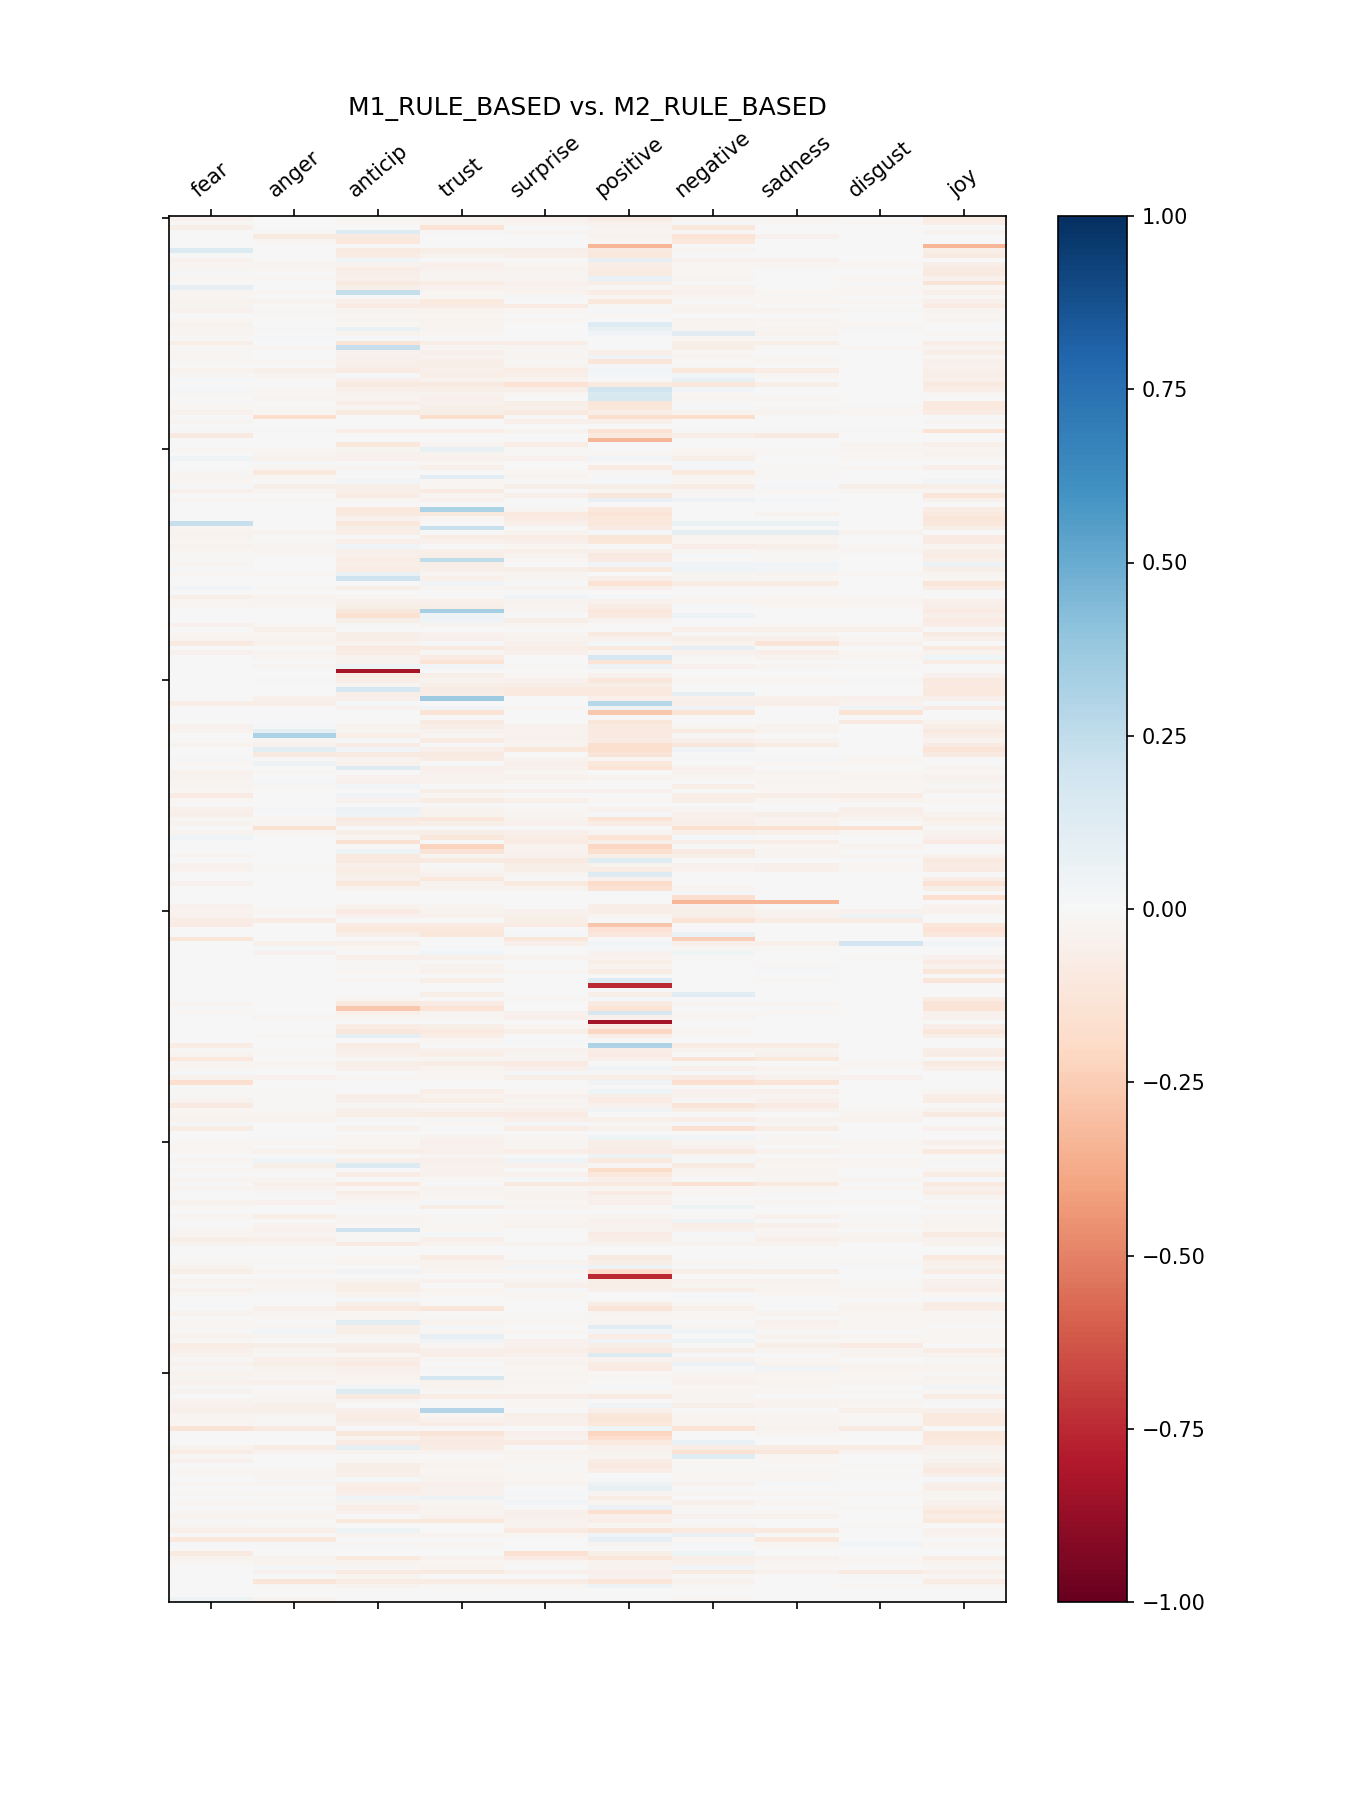

<IPython.core.display.Javascript object>


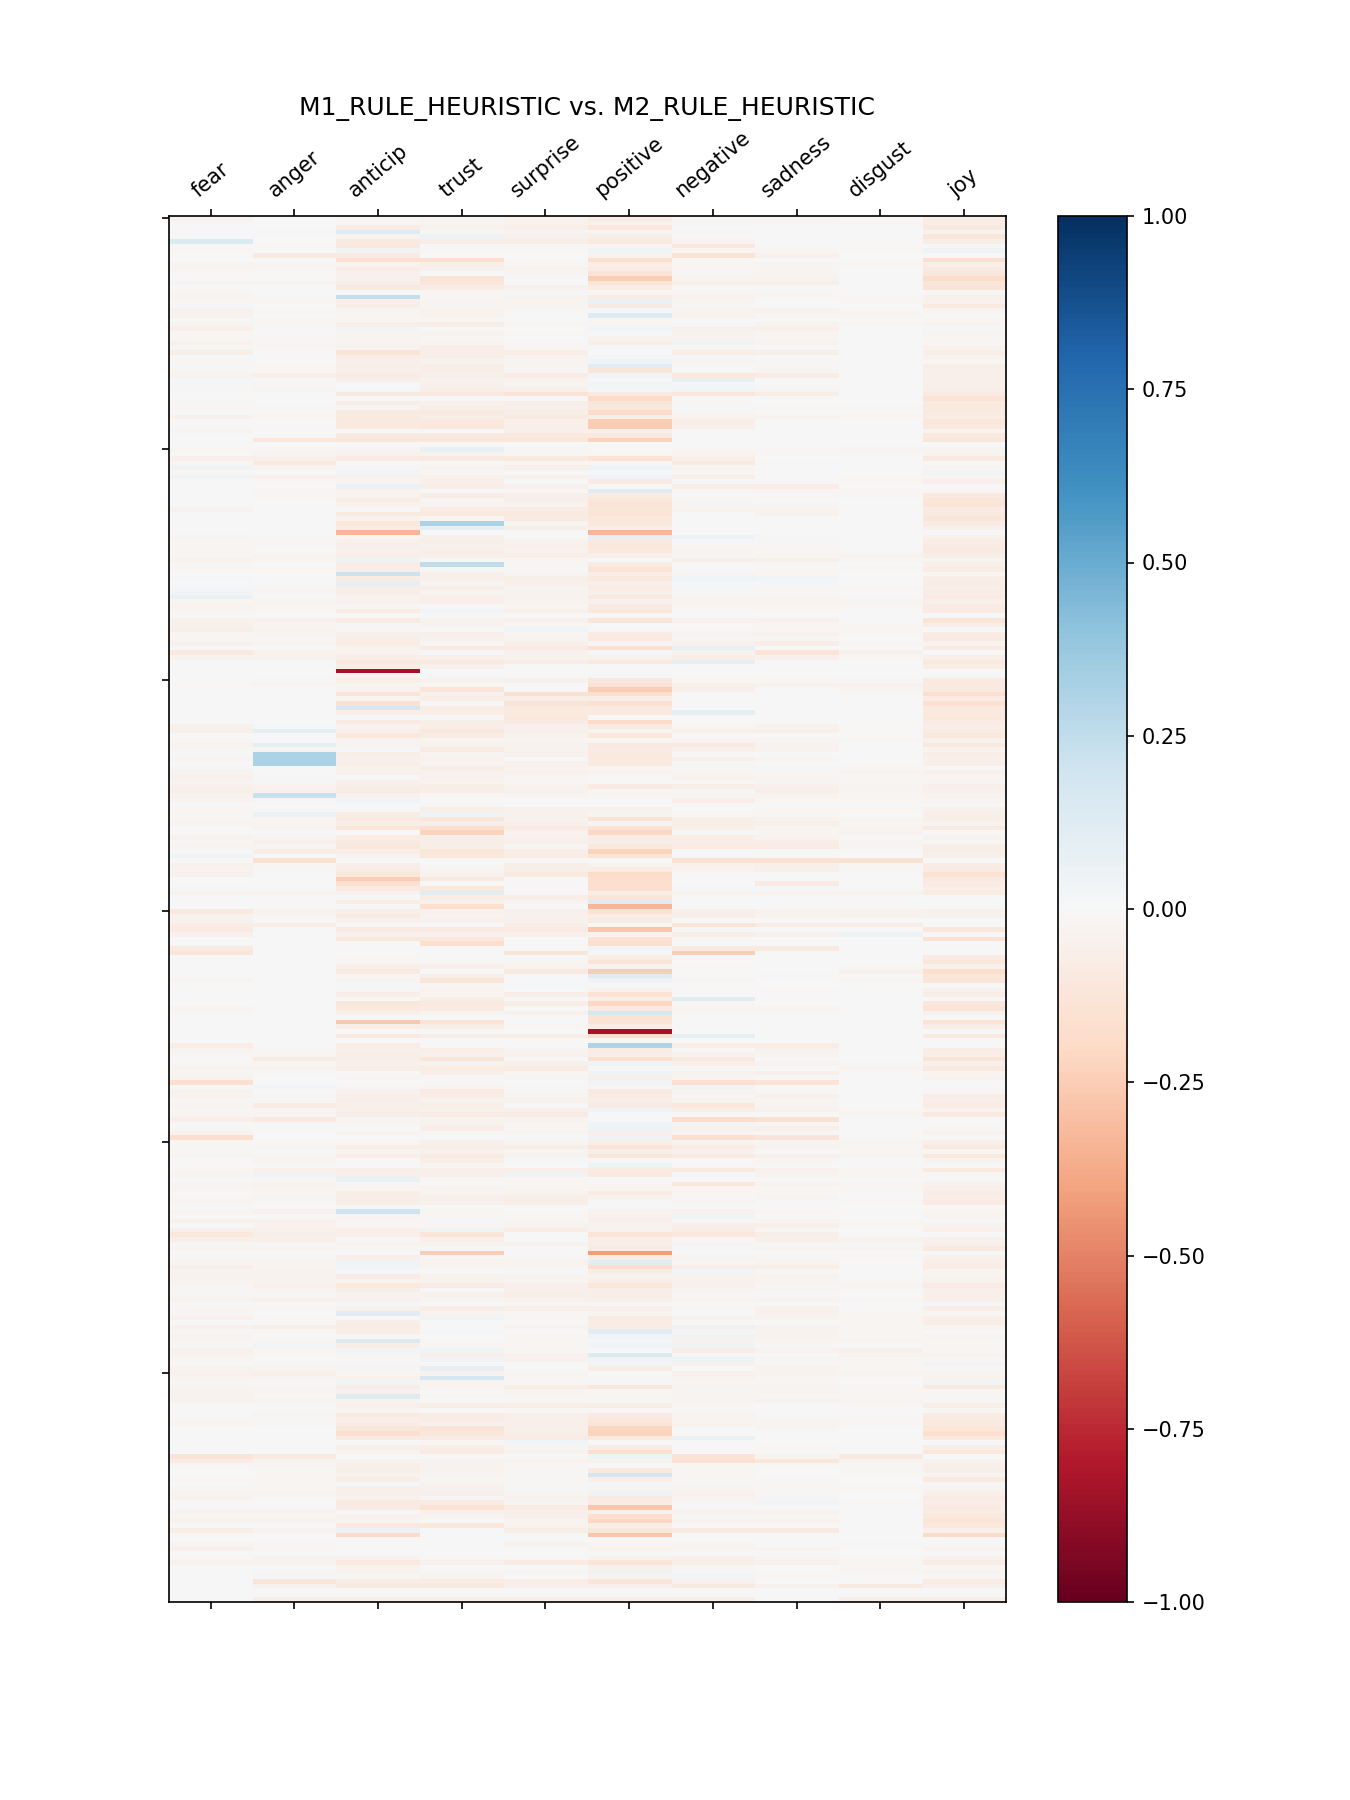

<IPython.core.display.Javascript object>


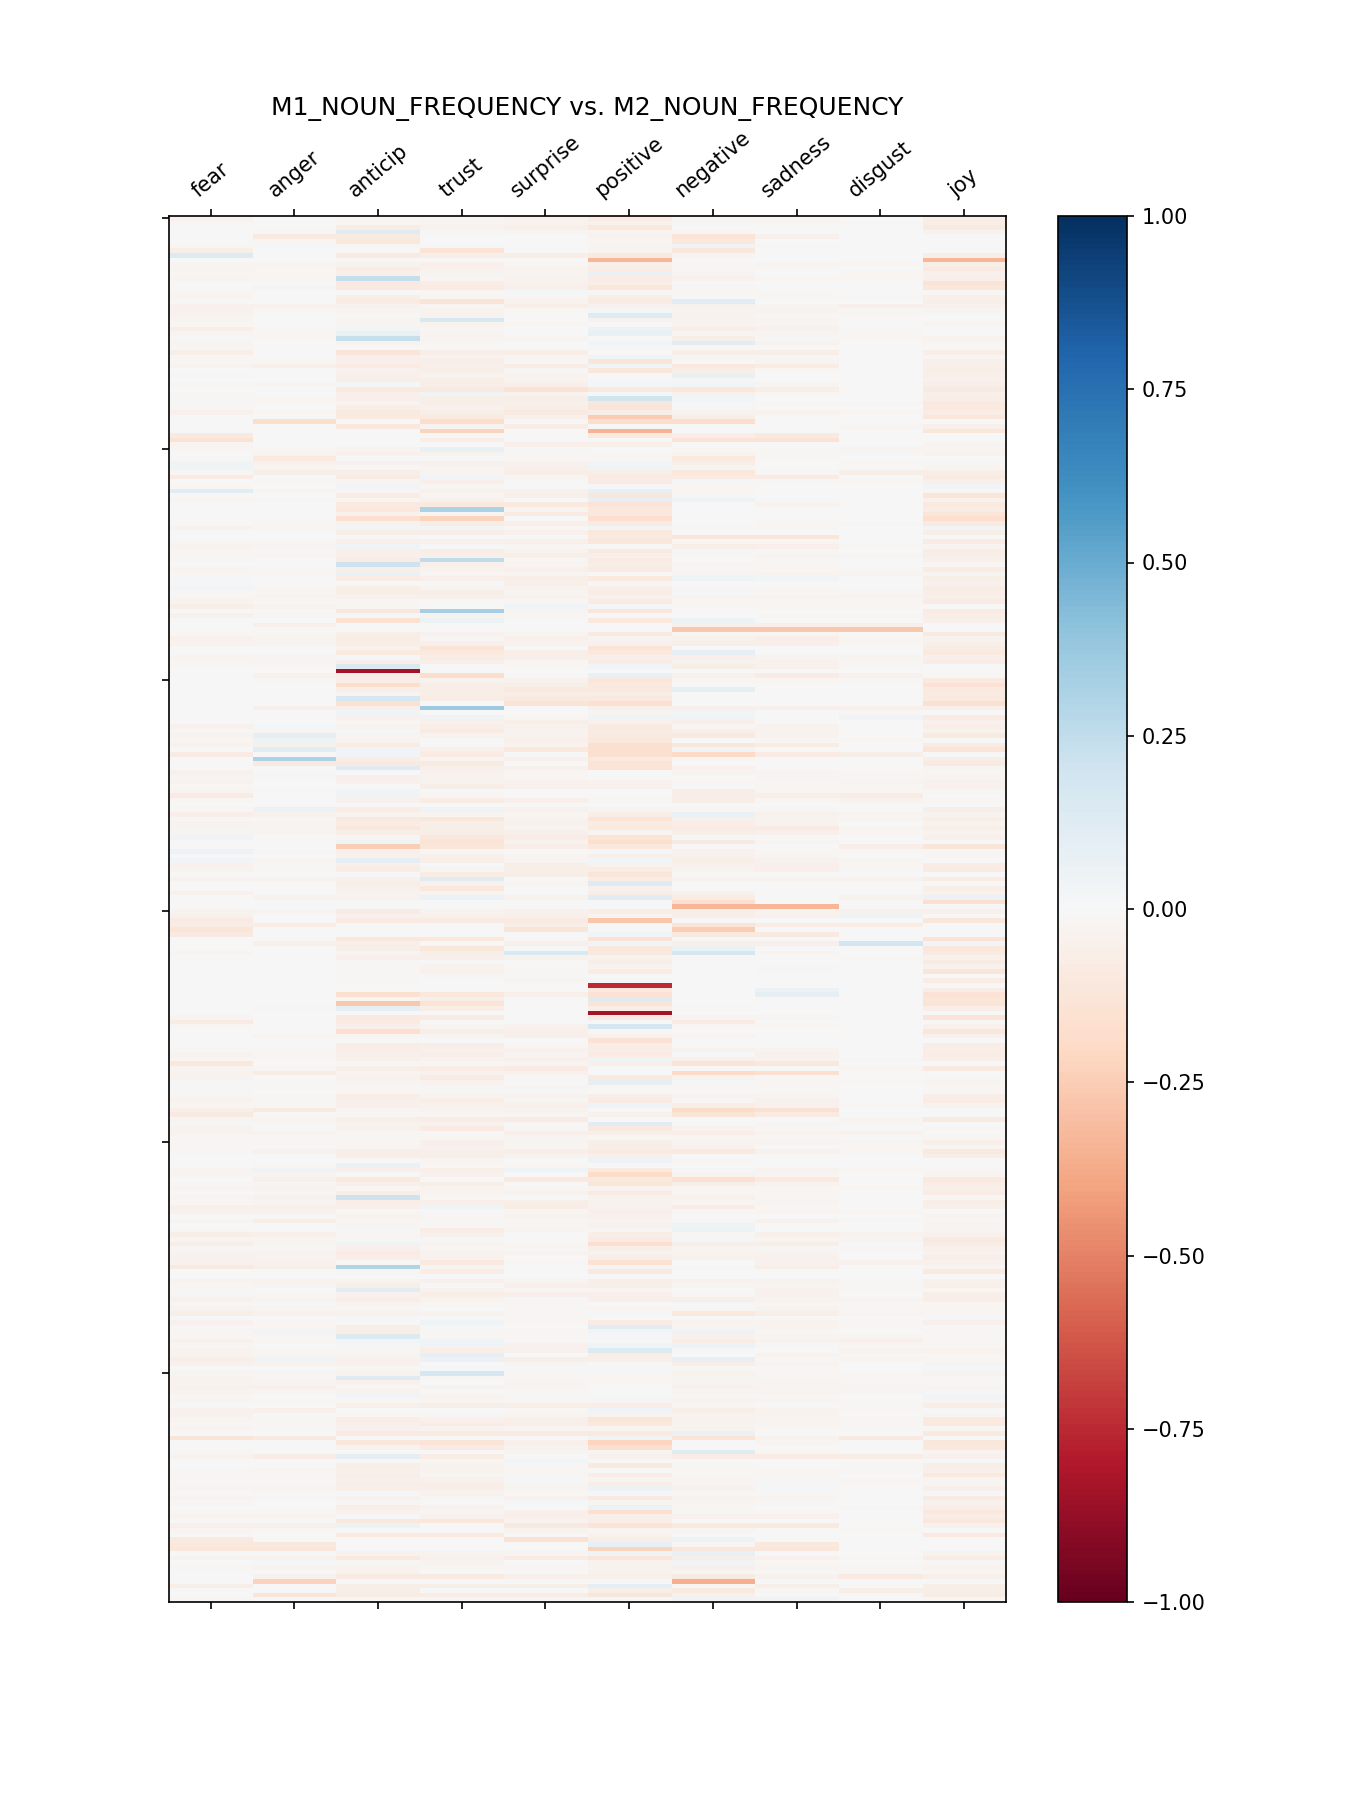

<IPython.core.display.Javascript object>


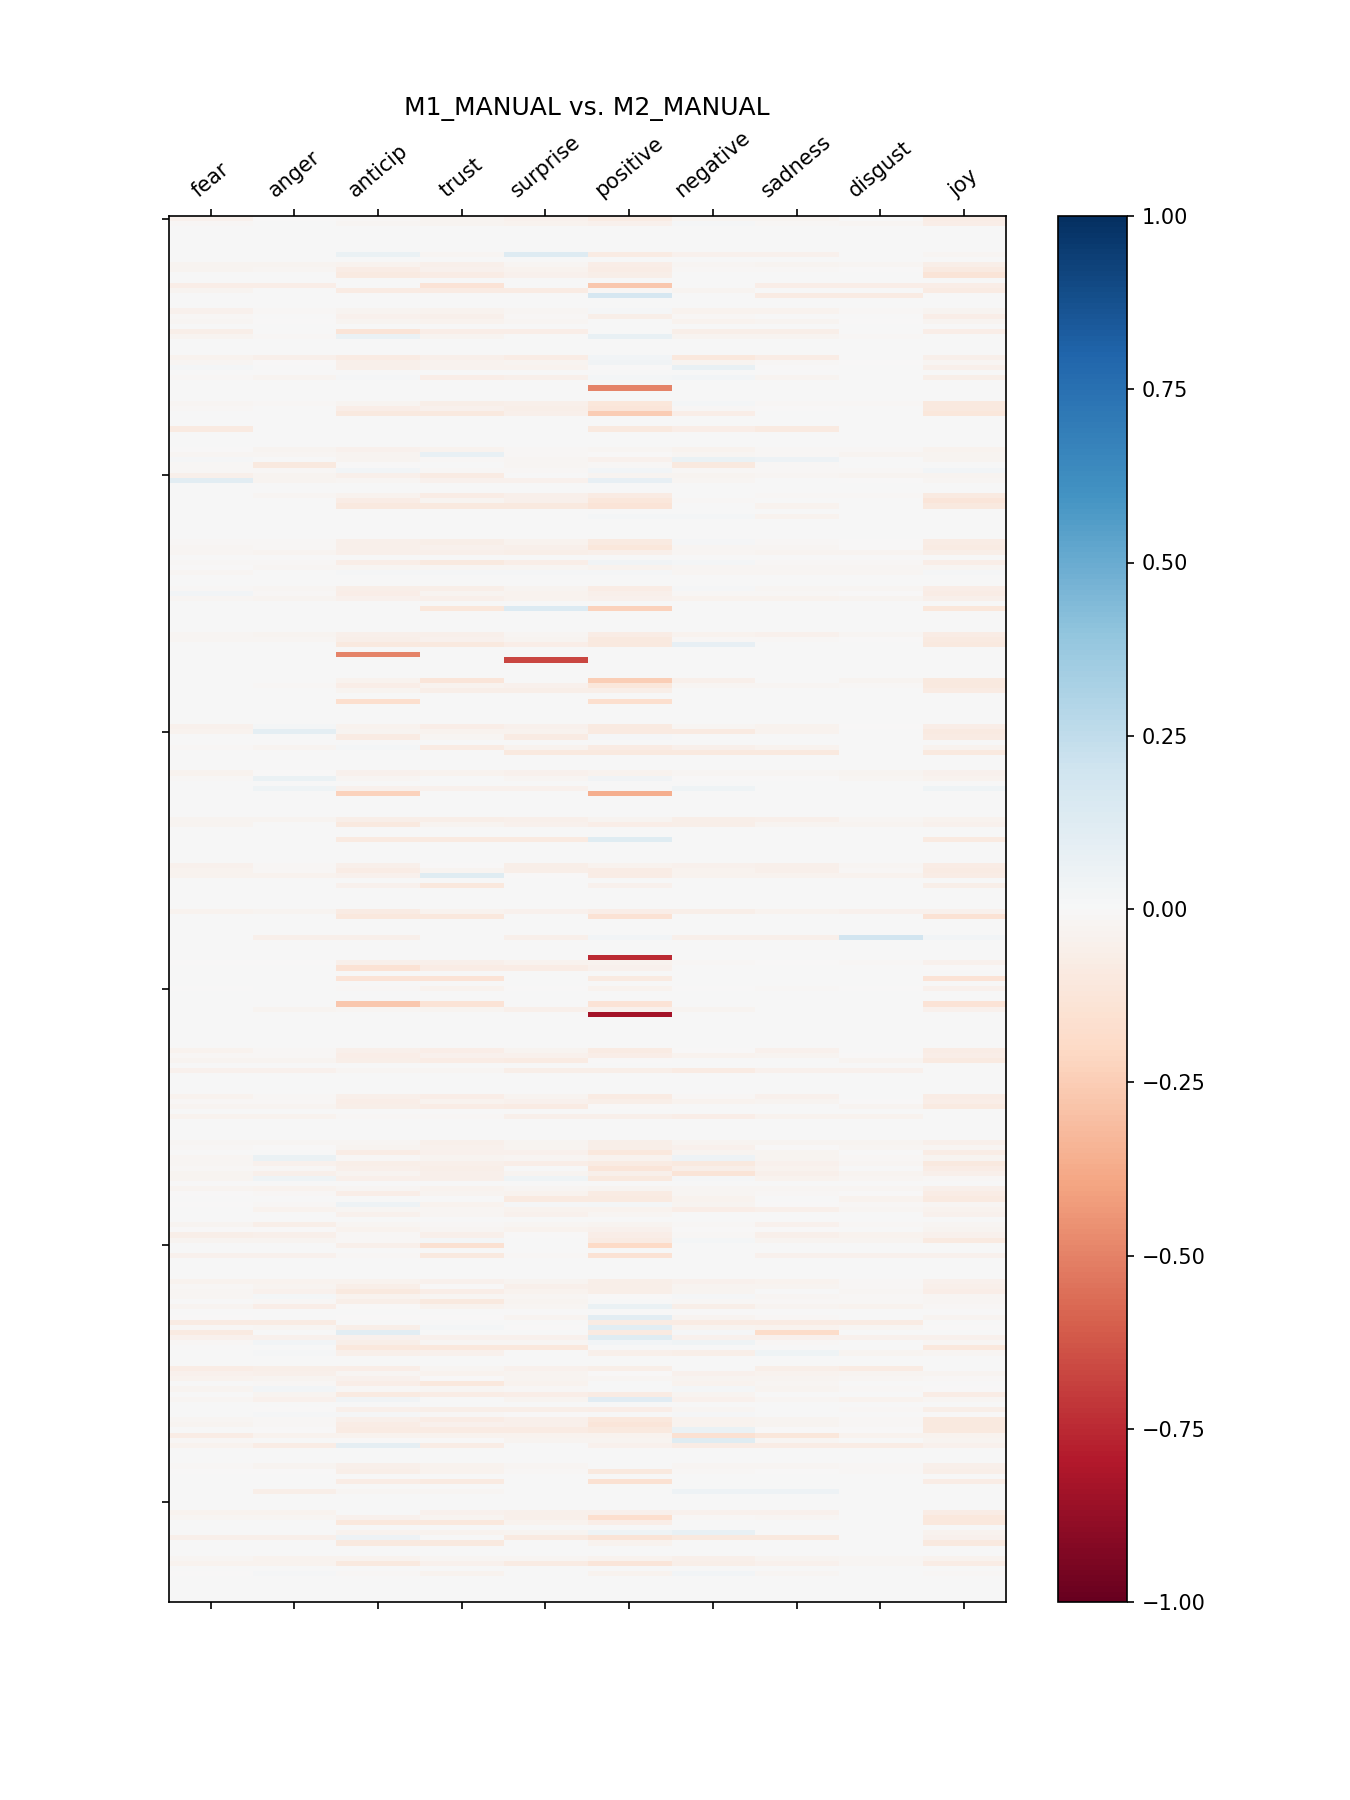

In [6]:
compare_dfs=[[M1_RULE_BASED,M2_RULE_BASED],[M1_RULE_HEURISTIC,M2_RULE_HEURISTIC], [M1_CONSOLIDATED, M2_CONSOLIDATED],[M1_MANUAL,M2_MANUAL]]

for df_pair in compare_dfs:
    title= DF_NAMES[df_pair[0]]+" vs. "+DF_NAMES[df_pair[1]]
    compare_data_matshow(df_pair[0],df_pair[1],title)

<IPython.core.display.Javascript object>


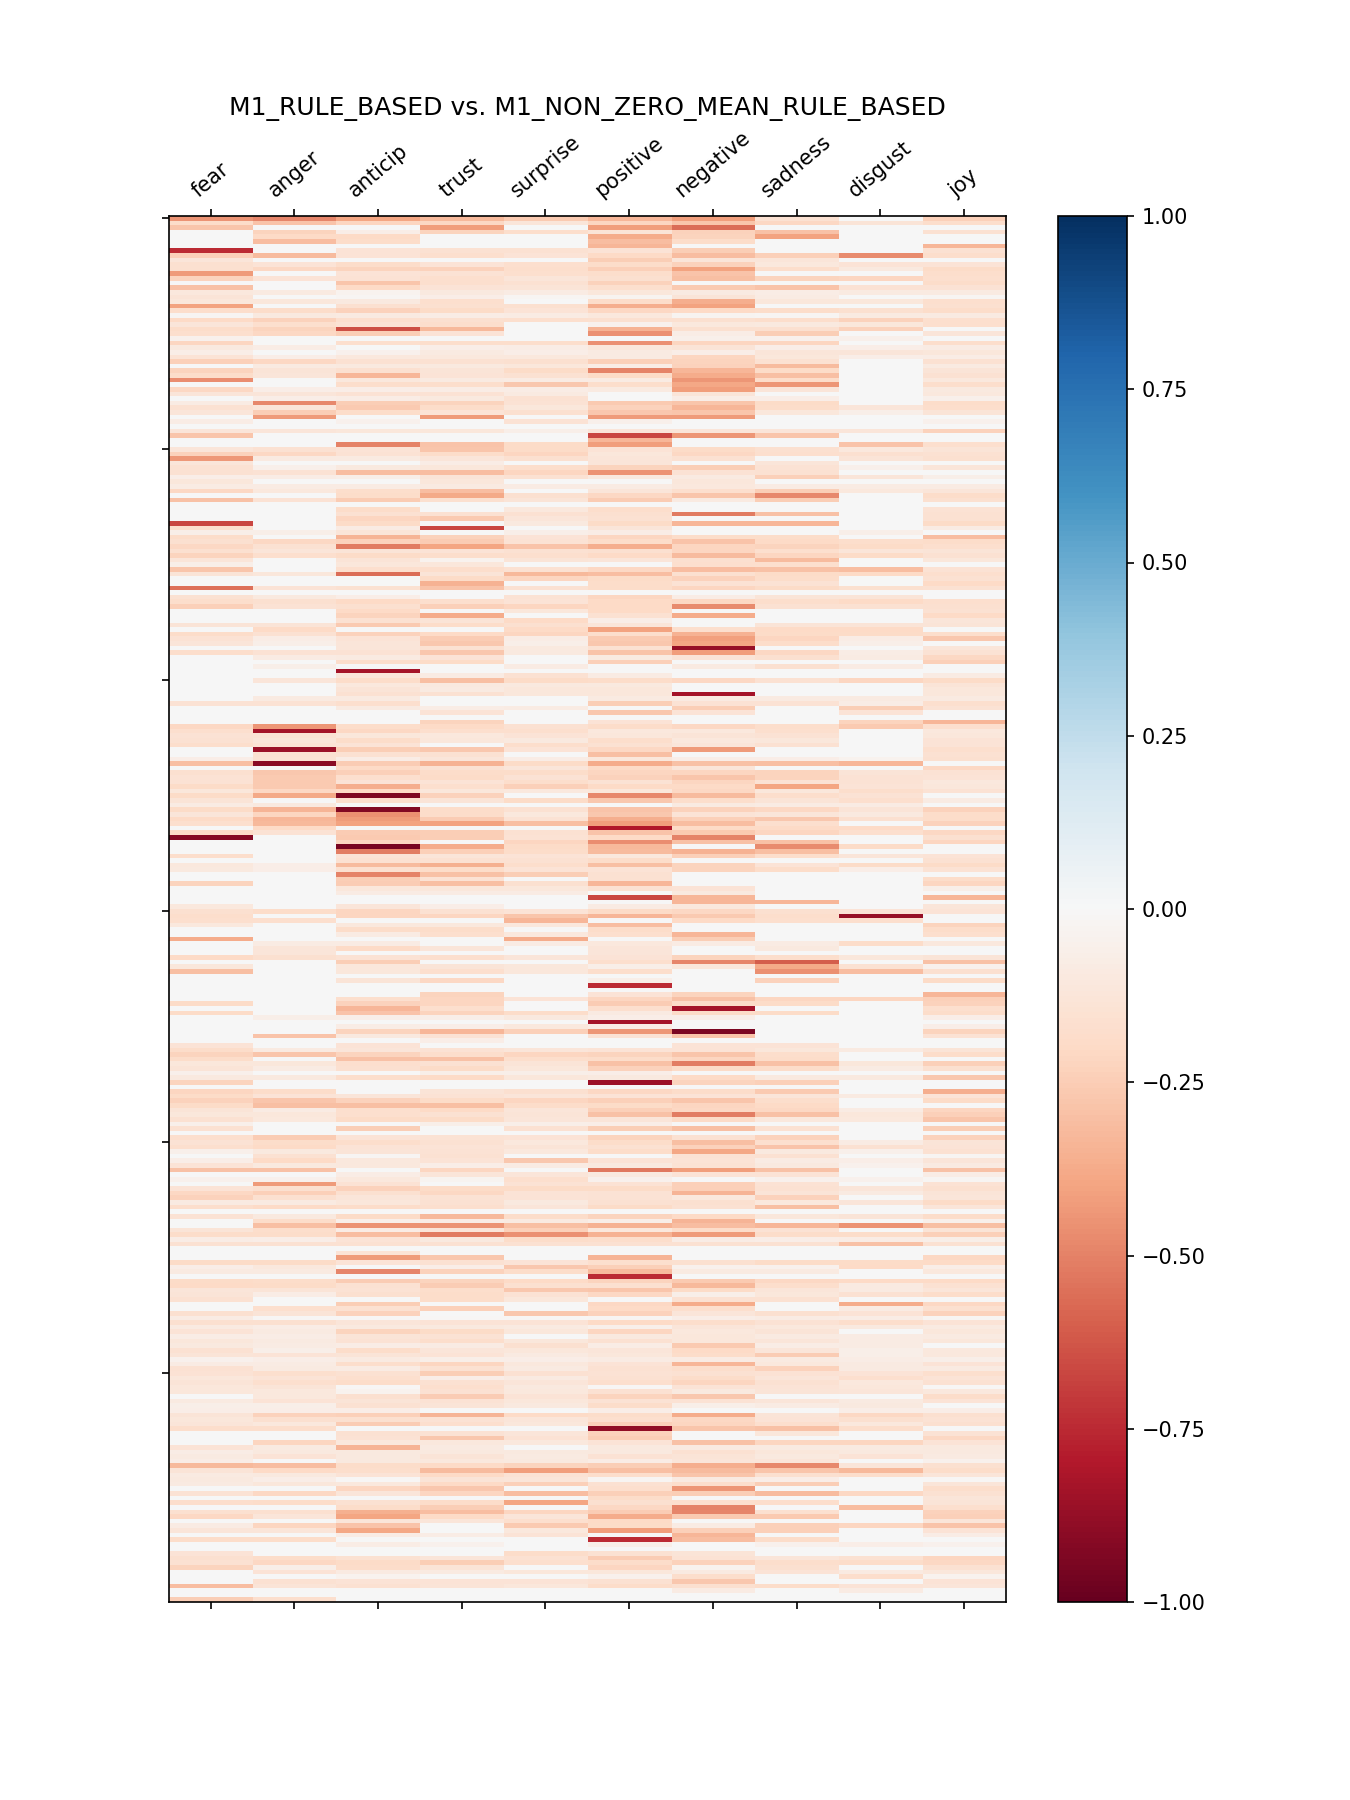

<IPython.core.display.Javascript object>


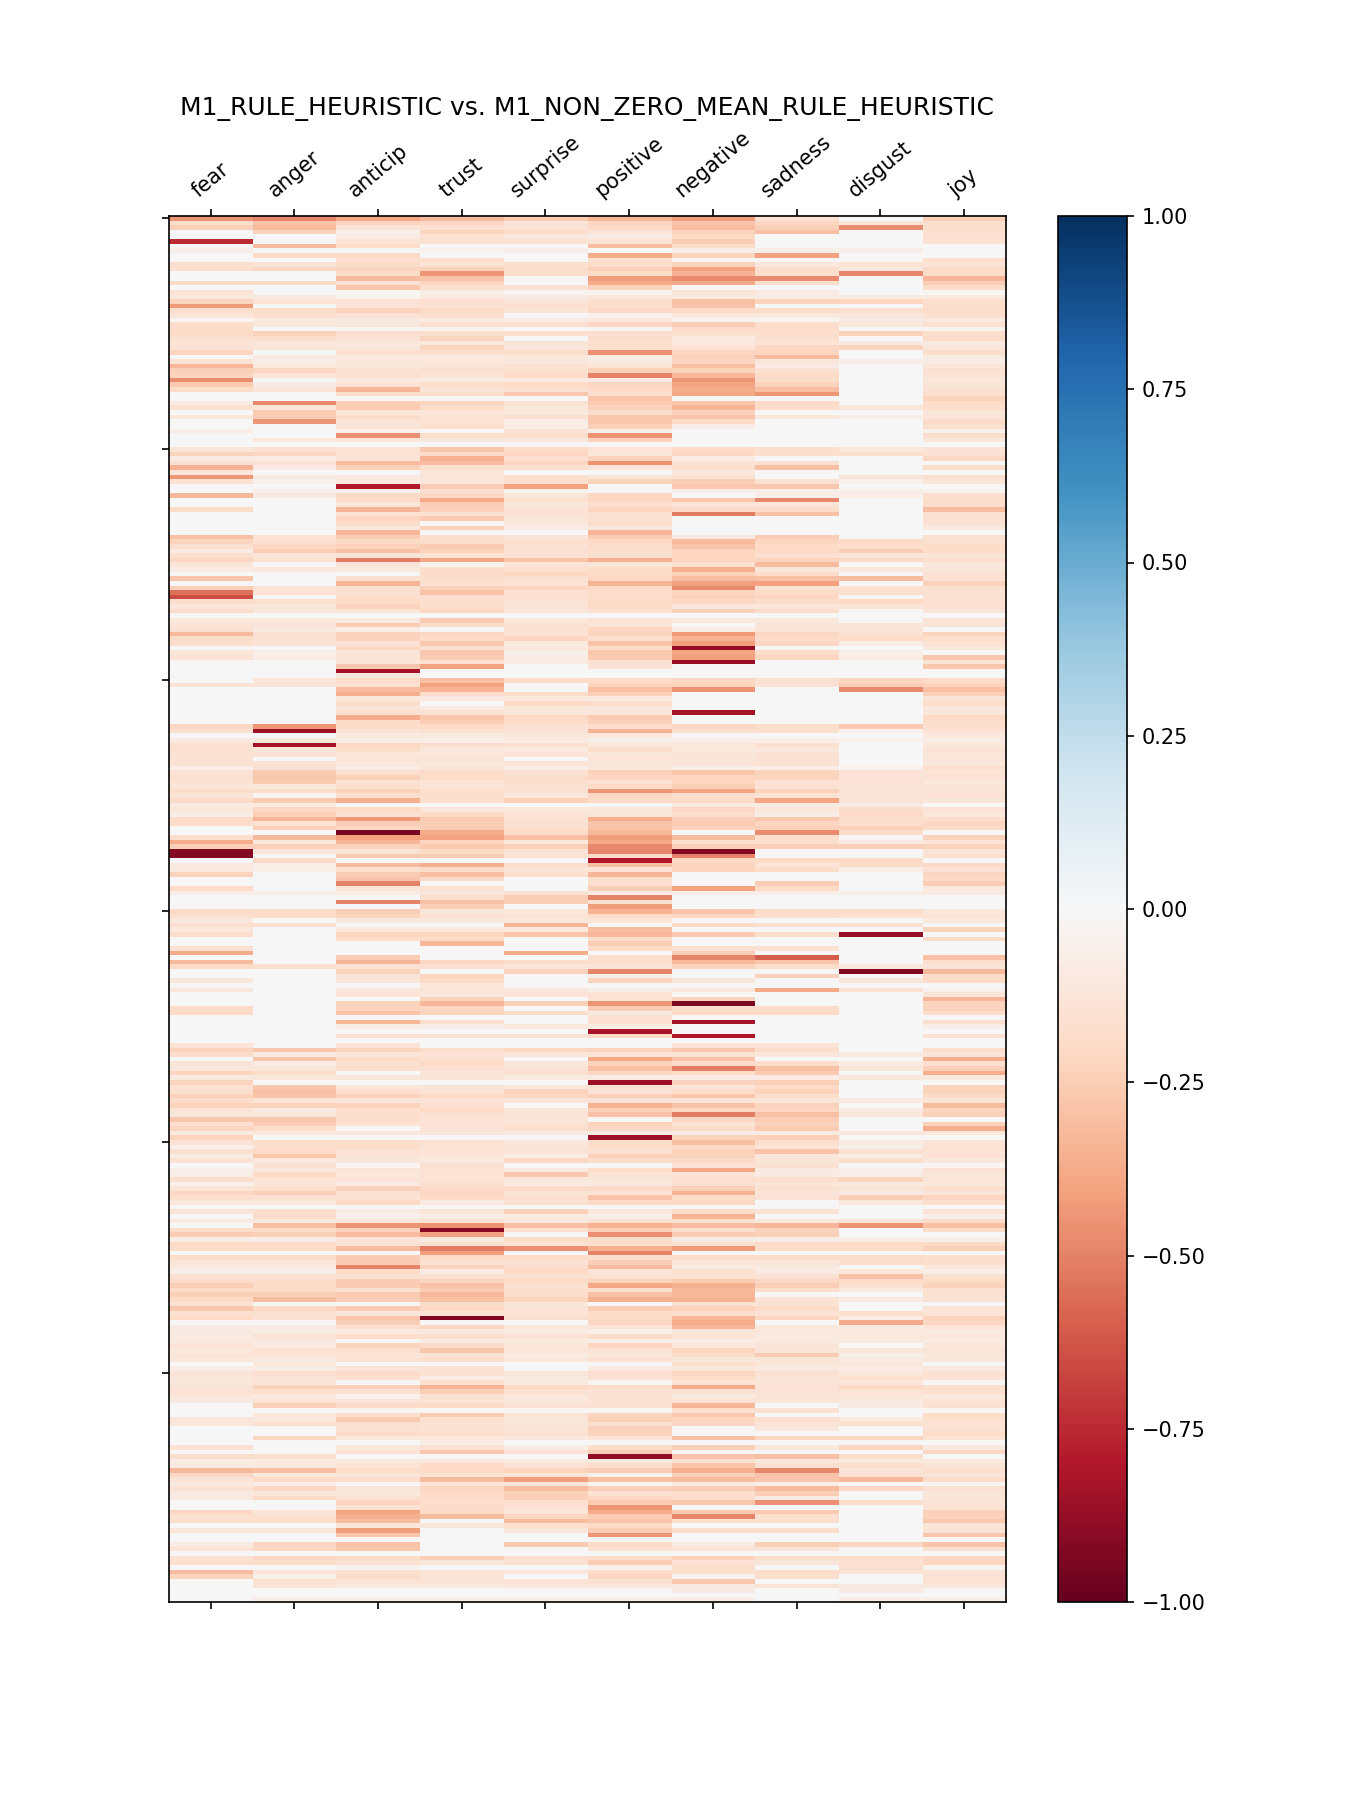

<IPython.core.display.Javascript object>


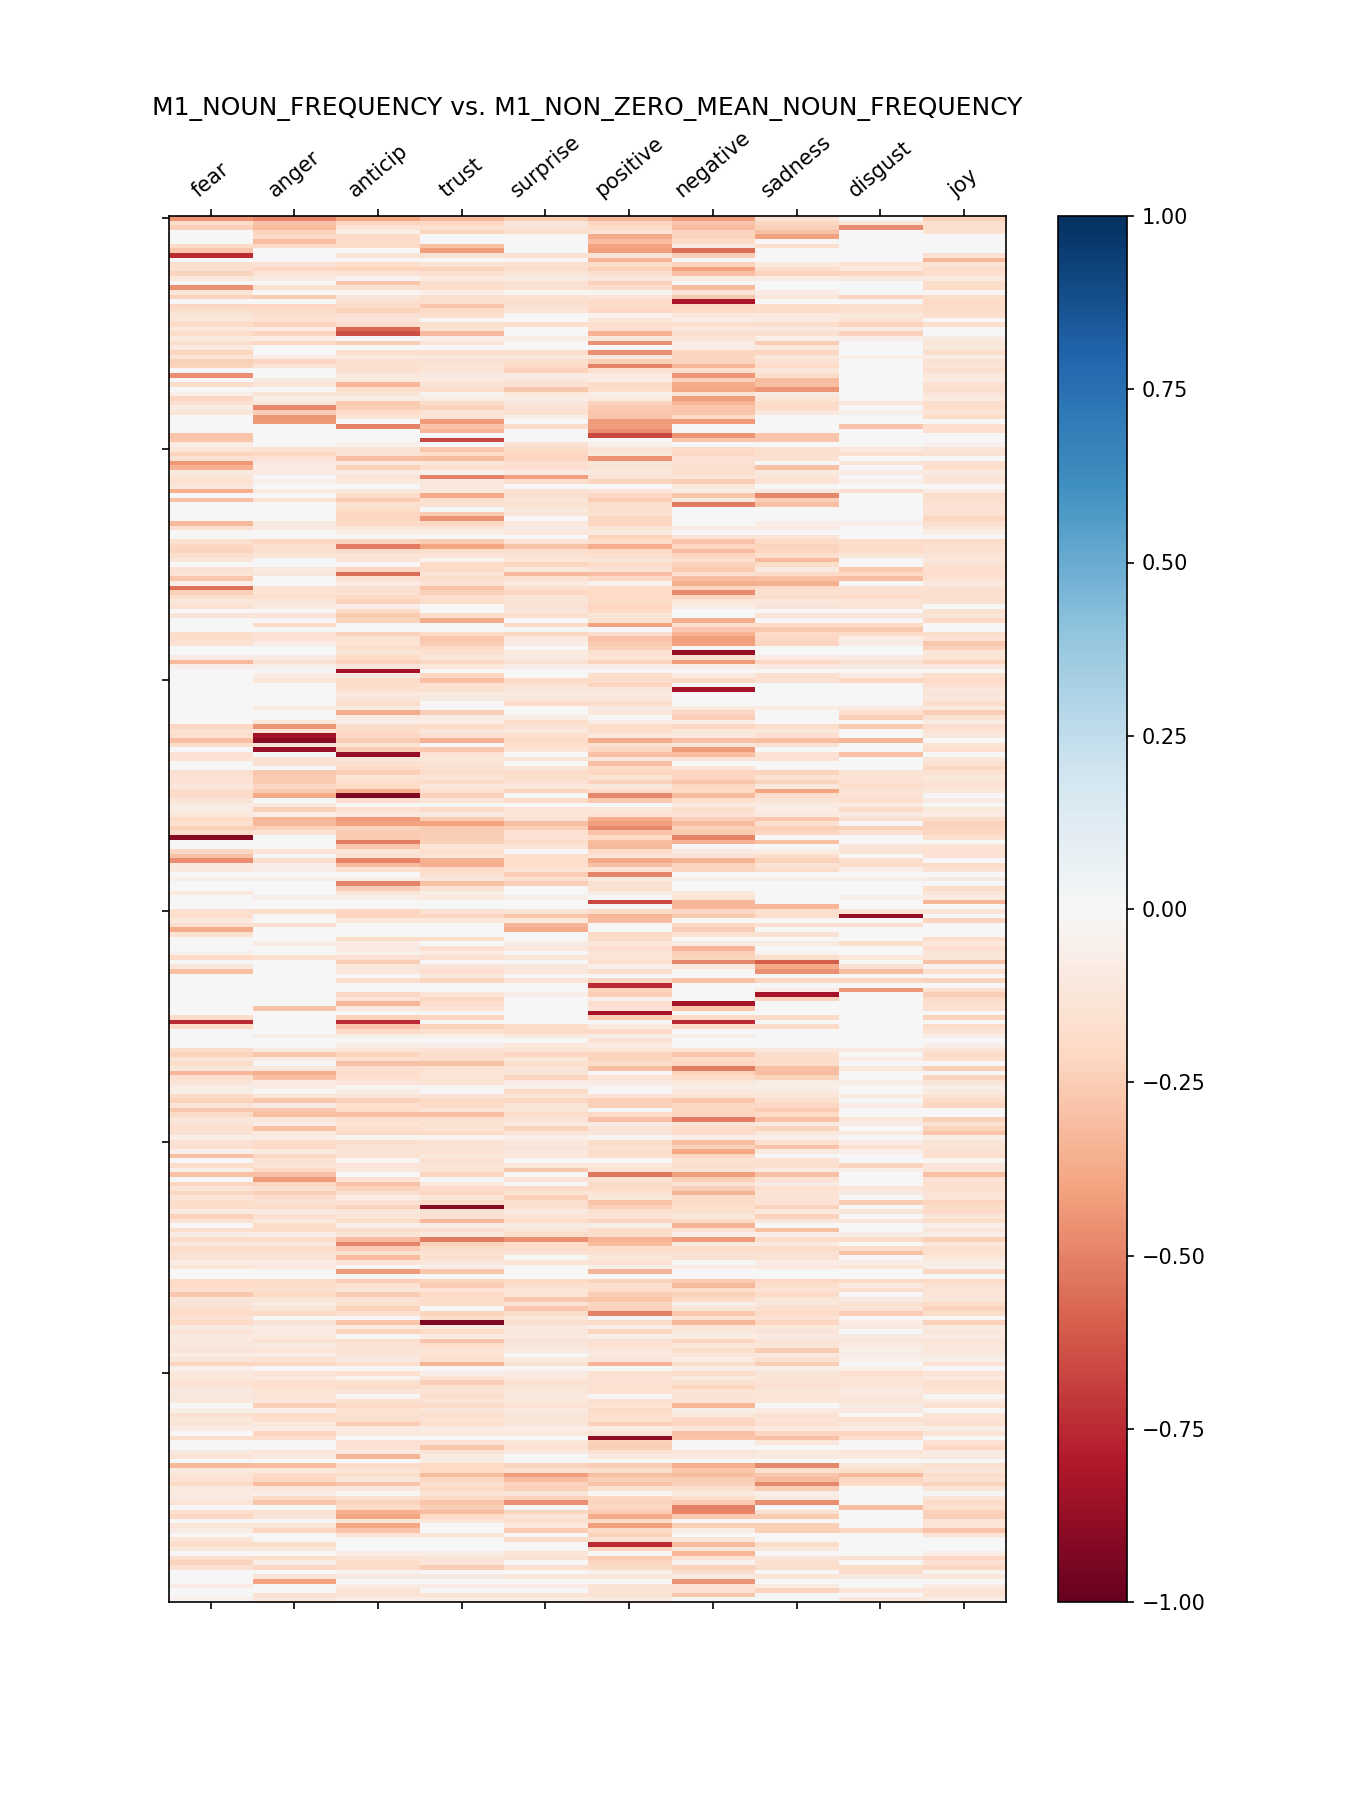

<IPython.core.display.Javascript object>


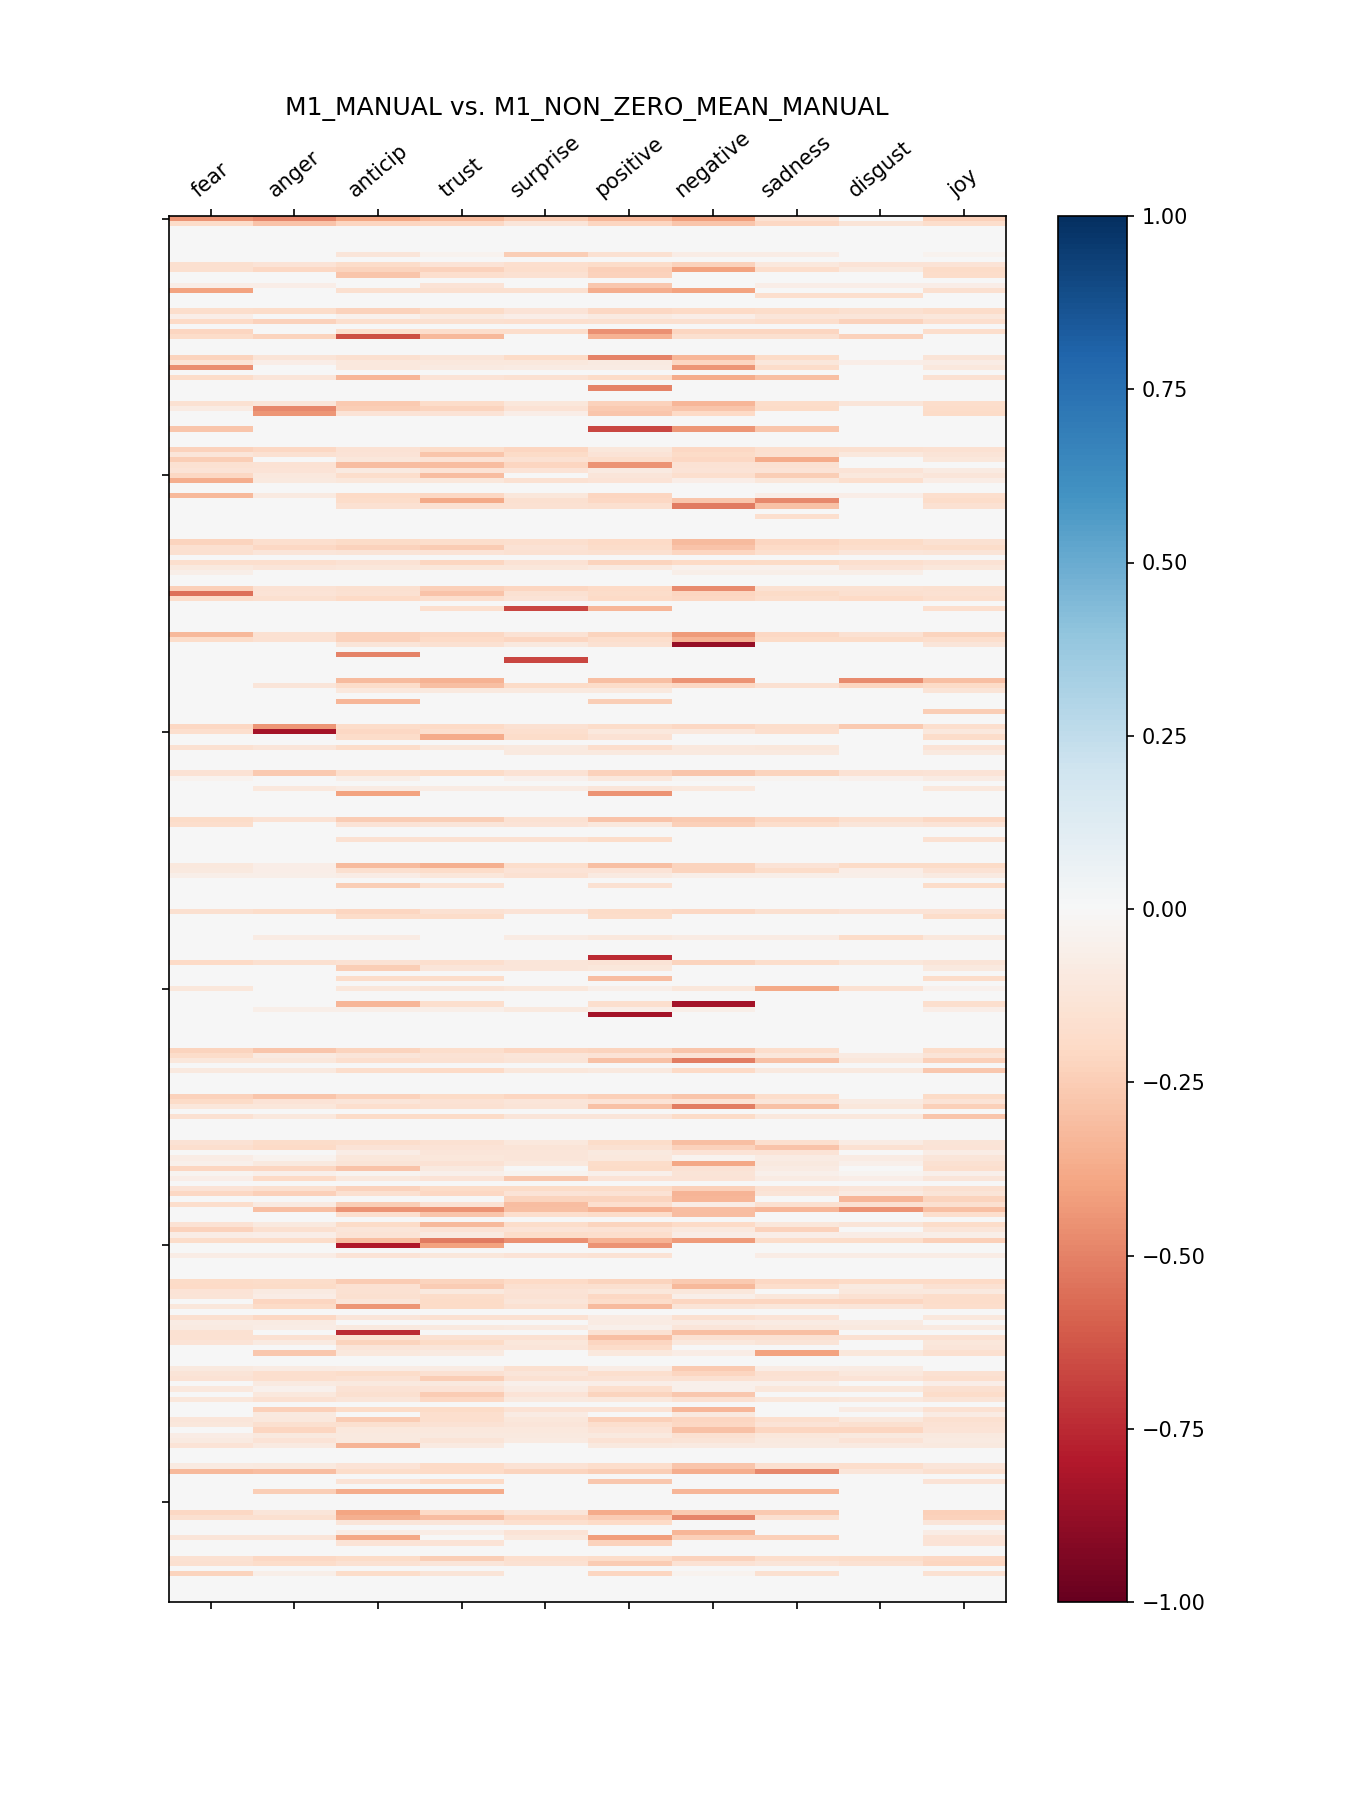

In [7]:
compare_dfs=[[M1_RULE_BASED,M1_NON_ZERO_MEAN_RULE_BASED],[M1_RULE_HEURISTIC,M1_NON_ZERO_MEAN_RULE_HEURISTIC], [M1_CONSOLIDATED, M1_NON_ZERO_MEAN_CONSOLIDATED],[M1_MANUAL,M1_NON_ZERO_MEAN_MANUAL]]


for df_pair in compare_dfs:
    title= DF_NAMES[df_pair[0]]+" vs. "+DF_NAMES[df_pair[1]]
    compare_data_matshow(df_pair[0],df_pair[1],title)

# Min, max, mean, and standard deviation for each aspect set and emotion method 
Use to find which method provokes stronger, less noisy emotion values


<IPython.core.display.Javascript object>


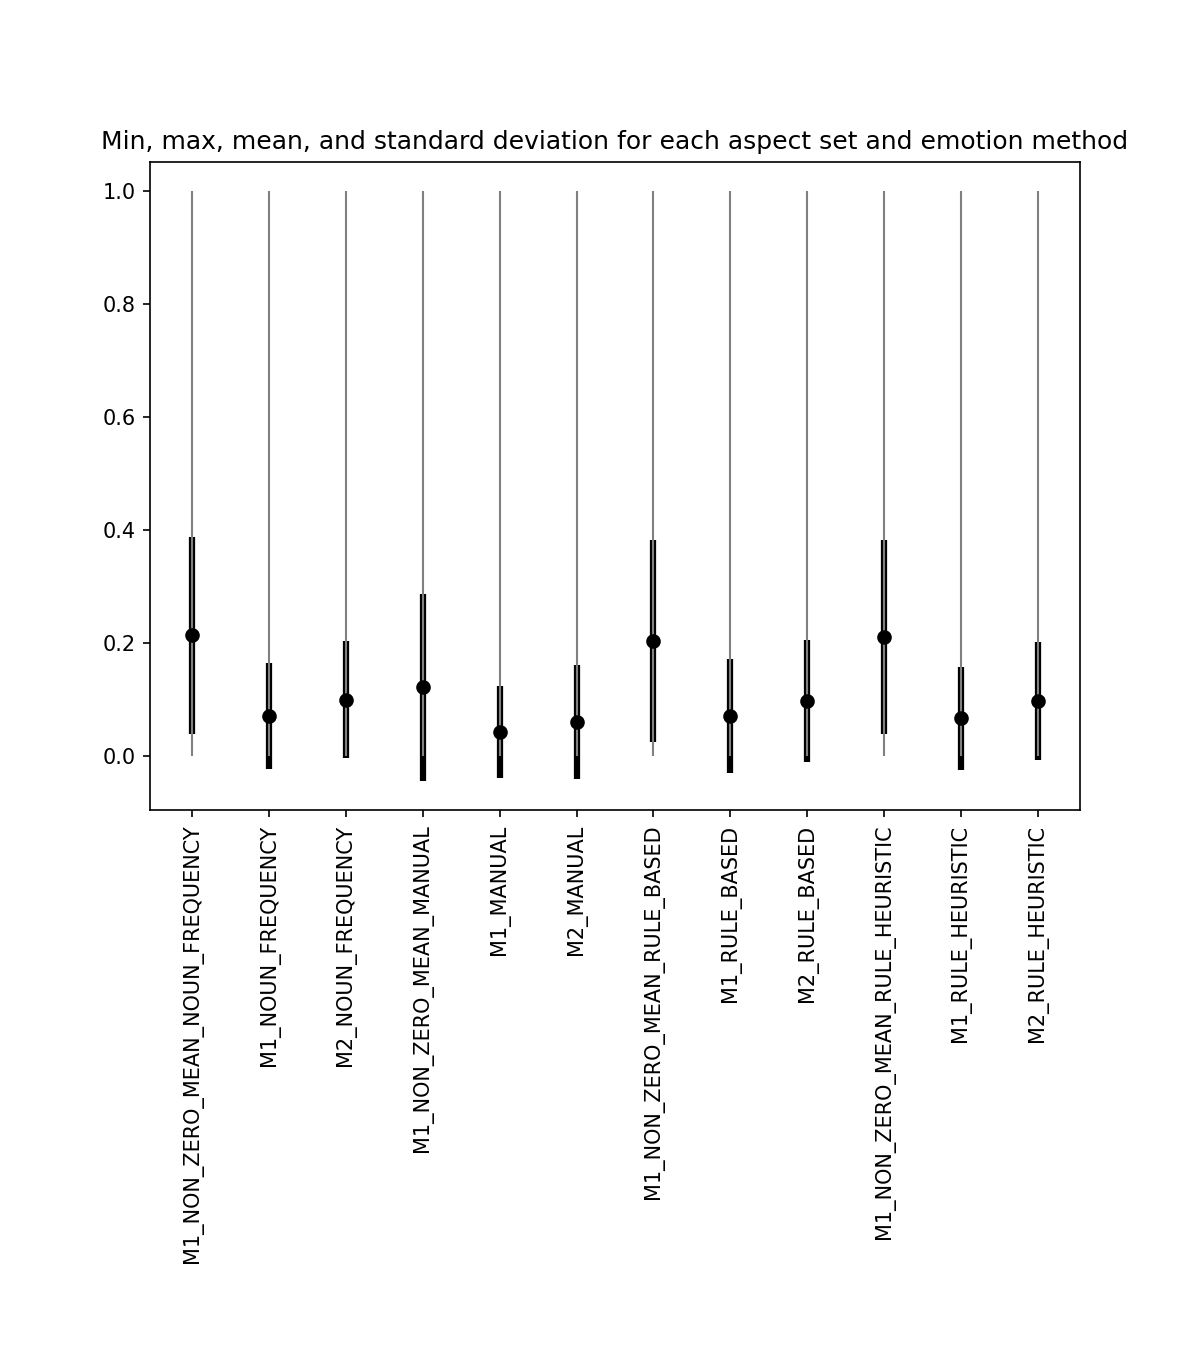

In [8]:
def compare_data_stats(df_list=aspect_emote_dfs):
    #compute the mean, std, min,max for each df
    mins=[]
    maxes=[]
    means=[]
    std=[]
    
    for df in df_list:
        #convert to numpy arrays
        df=df[EMOTIONS].to_numpy()
    
        mins.append(df.min())
        maxes.append(df.max())
        means.append(df.mean())
        std.append(df.std())
    
    mins=np.array(mins)
    maxes=np.array(maxes)
    means=np.array(means)
    std=np.array(std)
    
    fig=plt.figure(figsize=(8,9))
    ax = fig.add_subplot(111)

    # create stacked errorbars:
    ax.errorbar(np.arange(len(df_list)), means, std, fmt='ok', lw=3)
    ax.errorbar(np.arange(len(df_list)), means, [means - mins, maxes - means],
                 fmt='.k', ecolor='gray', lw=1)
    
    xaxis = np.arange(len(DF_NAMES))
    ax.set_xticks(xaxis)
    ax.set_xticklabels(DF_NAMES, rotation=90)
    plt.subplots_adjust(bottom=0.4)
    plt.title("Min, max, mean, and standard deviation for each aspect set and emotion method")
    plt.show()
    
compare_data_stats()

# Correlation matrix
Build correlation matrix between average product emotions and ratings, to check for correlation between emotions and rating. Ie. do negative emotions correlate to lower rating


In [9]:
#see if there is a corilation between ratings and certan emotion
def get_corr_matrix(emote_df,rating_values,title=""):
    emote_rating_df=emote_df.assign(rating=pd.Series(rating_values).values)
    emote_rating_df=emote_rating_df[['fear','anger','sadness','disgust','negative','trust','anticip','surprise','joy','positive','rating']]
    
    
    #make correlation matrix
    corr=emote_rating_df.corr()
    
    #get last row rating correlation
    rating_row=corr.iloc[[-1]]
    val=corr.iloc[[-1]]
    
    #add style to show negive value
    #display(corr)
    rating_row=rating_row.style.background_gradient(cmap='coolwarm', axis=None,vmin=-1,vmax=1)
    if title != "":
        rating_row=rating_row.set_caption(title)
    display(rating_row)
    return val.values.tolist()[0]

In [10]:
top_car_ratings = pd.read_pickle('dataset/top_car_star_ratings.pkl')
top_car_reviews= pd.read_pickle('dataset/top_car_reviews.pkl')
#top_car_ratings

In [11]:
rating_values=top_car_reviews[['asin','overall']].groupby('asin').mean()['overall'].values

In [12]:
#get average emotion value for each product
emote_df=aspect_emote_dfs[M1_NON_ZERO_MEAN_CONSOLIDATED][["asin"]+EMOTIONS]
mean_emote_df=emote_df.groupby(['asin']).mean()
#mean_emote_df

In [13]:
get_corr_matrix(mean_emote_df,rating_values)

,fear,anger,sadness,disgust,negative,trust,anticip,surprise,joy,positive,rating
rating,-0.268561,-0.321783,-0.068322,-0.208409,-0.236530,-0.181060,-0.008517,-0.107529,0.351917,0.519249,1.000000


[-0.26856135583298796,
 -0.3217834151338773,
 -0.06832173473490122,
 -0.20840875333892558,
 -0.23652970658996128,
 -0.18106012069117147,
 -0.008517066315025003,
 -0.10752943222193373,
 0.3519170623424208,
 0.5192486940550317,
 1.0]

In [14]:
rating_corr=[]
i=0
for df in aspect_emote_dfs:
    #get average emotion value for each product
    emote_df=df[["asin"]+EMOTIONS]
    mean_emote_df=emote_df.groupby(['asin']).mean()
    
    
    row=get_corr_matrix(mean_emote_df,rating_values,DF_NAMES[i])
    rating_corr.append(row)
    i+=1

,fear,anger,sadness,disgust,negative,trust,anticip,surprise,joy,positive,rating
rating,-0.268561,-0.321783,-0.068322,-0.208409,-0.236530,-0.181060,-0.008517,-0.107529,0.351917,0.519249,1.000000


,fear,anger,sadness,disgust,negative,trust,anticip,surprise,joy,positive,rating
rating,-0.449750,-0.589990,-0.208291,-0.164886,-0.729856,-0.189522,-0.102854,0.035715,0.341072,0.429992,1.000000


,fear,anger,sadness,disgust,negative,trust,anticip,surprise,joy,positive,rating
rating,-0.392797,-0.710626,-0.265716,-0.437996,-0.708817,0.087934,0.135362,0.108767,0.542443,0.657731,1.000000


,fear,anger,sadness,disgust,negative,trust,anticip,surprise,joy,positive,rating
rating,-0.530718,-0.503645,-0.513185,-0.401563,-0.444510,-0.526384,-0.413256,-0.421376,-0.220429,-0.067440,1.000000


,fear,anger,sadness,disgust,negative,trust,anticip,surprise,joy,positive,rating
rating,-0.485253,-0.556471,-0.493430,-0.093005,-0.589798,-0.540925,-0.366165,-0.418643,0.127725,0.016654,1.000000


,fear,anger,sadness,disgust,negative,trust,anticip,surprise,joy,positive,rating
rating,-0.505472,-0.622331,-0.538268,-0.307852,-0.613774,-0.485366,-0.257512,-0.243684,0.205901,0.280889,1.000000


,fear,anger,sadness,disgust,negative,trust,anticip,surprise,joy,positive,rating
rating,-0.300168,-0.352722,-0.128264,-0.290738,-0.188106,-0.178675,-0.089015,-0.148640,0.263850,0.591792,1.000000


,fear,anger,sadness,disgust,negative,trust,anticip,surprise,joy,positive,rating
rating,-0.365416,-0.661777,-0.232582,-0.206886,-0.675247,-0.219792,-0.075601,-0.086026,0.184255,0.507221,1.000000


,fear,anger,sadness,disgust,negative,trust,anticip,surprise,joy,positive,rating
rating,-0.385822,-0.736019,-0.202877,-0.415385,-0.614689,-0.020181,0.060972,0.045823,0.399374,0.587814,1.000000


,fear,anger,sadness,disgust,negative,trust,anticip,surprise,joy,positive,rating
rating,-0.229404,-0.310396,-0.149107,-0.278320,-0.165797,-0.251789,-0.073161,-0.136235,0.255117,0.586592,1.000000


,fear,anger,sadness,disgust,negative,trust,anticip,surprise,joy,positive,rating
rating,-0.307478,-0.373247,-0.255472,-0.544308,-0.552711,-0.313275,-0.310155,-0.192099,0.119394,0.430364,1.000000


,fear,anger,sadness,disgust,negative,trust,anticip,surprise,joy,positive,rating
rating,-0.286043,-0.650831,-0.242855,-0.567265,-0.511425,-0.031880,0.000451,0.085621,0.390324,0.701873,1.000000


In [15]:
with open("corr_rating.csv","w+") as f:
    i=0
    print(",fear,anger,sadness,disgust,negative,trust,anticip,surpise,joy,positive",file=f)
    for row in rating_corr:
        print(DF_NAMES[i],end=",",file=f)

        for corr in row:
            print(corr,end=",",file=f)
        print("",file=f)
        i+=1